In [26]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import yfinance as yf 
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Variables to fetch the stock prices
ticker = 'NVDA'
start_date = '2018-01-01'
end_date = '2024-06-01'

# Get stock prices for the specificed period 
data = yf.download(ticker, start_date, end_date)

# Print stock price data
print(data)

[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2018-01-02    48.945000    49.875000    48.625000    49.837502    49.310471   
2018-01-03    51.025002    53.424999    50.937500    53.117500    52.555779   
2018-01-04    53.939999    54.512501    53.172501    53.397499    52.832836   
2018-01-05    53.547501    54.227501    52.770000    53.849998    53.280544   
2018-01-08    55.099998    56.250000    54.645000    55.500000    54.913101   
...                 ...          ...          ...          ...          ...   
2024-05-24  1044.489990  1064.750000  1030.000000  1064.689941  1064.689941   
2024-05-28  1102.439941  1149.390015  1098.829956  1139.010010  1139.010010   
2024-05-29  1130.500000  1154.920044  1109.010010  1148.250000  1148.250000   
2024-05-30  1146.500000  1158.189941  1096.630005  1105.000000  1105.000000   
2024-05-31  1125.199951  1127.170044  1069.400024  1

In [27]:
df = pd.DataFrame(data)

In [28]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,48.945000,49.875000,48.625000,49.837502,49.310471,35561600
2018-01-03,51.025002,53.424999,50.937500,53.117500,52.555779,91470400
2018-01-04,53.939999,54.512501,53.172501,53.397499,52.832836,58326800
2018-01-05,53.547501,54.227501,52.770000,53.849998,53.280544,58012400
2018-01-08,55.099998,56.250000,54.645000,55.500000,54.913101,88121600


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1614 entries, 2018-01-02 to 2024-05-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1614 non-null   float64
 1   High       1614 non-null   float64
 2   Low        1614 non-null   float64
 3   Close      1614 non-null   float64
 4   Adj Close  1614 non-null   float64
 5   Volume     1614 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 88.3 KB


In [30]:
df['date'] = pd.to_datetime(df.index)

In [31]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2018-01-02,48.945000,49.875000,48.625000,49.837502,49.310471,35561600,2018-01-02
2018-01-03,51.025002,53.424999,50.937500,53.117500,52.555779,91470400,2018-01-03
2018-01-04,53.939999,54.512501,53.172501,53.397499,52.832836,58326800,2018-01-04
2018-01-05,53.547501,54.227501,52.770000,53.849998,53.280544,58012400,2018-01-05
2018-01-08,55.099998,56.250000,54.645000,55.500000,54.913101,88121600,2018-01-08


In [32]:
# Create the candlestick chart 
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

#Customize the chart layout 
fig.update_layout(
    title = 'Stock price Chart NVDA',
    yaxis_title = 'Price ($)',
    xaxis_rangeslider_visible = False)

fig.show()

In [33]:
df.drop(['date', 'Volume'], axis = 1, inplace = True)

<AxesSubplot: >

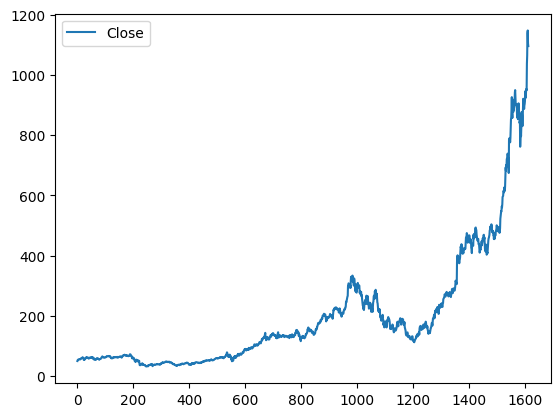

In [34]:
df.reset_index(drop = True, inplace = True)
df.plot.line(y='Close', use_index = True)

In [36]:
#Split the dataset into training and testing sets 
X = df[['Open', 'Close', 'High', 'Low', 'Adj Close']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Build the Random Forest Regression Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

#Train the model
rf.fit(X_train, y_train)

# Make the predictions on the testing set 
y_pred = rf.predict(X_test)

# Evaluate the model with mean squared error 
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 5.228605500152032


In [37]:
#Input some new data values to predict stock price
new_data = np.array([[1126, 1125.8300, 1124.534, 1125.67000, 1125.856]])

# Make the predictions with the training model
predicited_price = rf.predict(new_data)

# Print the predicited stock price 
print('Predicited Stock Price:', predicited_price[0])

Predicited Stock Price: 1125.0195989990234


c:\Users\tejvi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

